In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

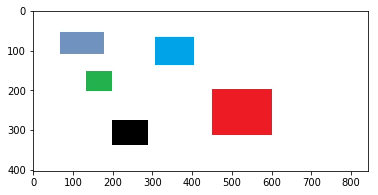

In [4]:
img = cv2.imread(r"C:\Python36\images\demo.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [5]:
img.shape

(403, 843, 3)

In [30]:
#img = cv2.imread(r"C:\Python36\images\demo1.jpg")
def get_red(img):
    corners=[]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    for i in range(0,img.shape[0],50):
        for j in range(0,img.shape[1],50):
            # crop the image to get 50x50 image
            slice_img = img[i:i+50,j:j+50,:]
            # check for red content in the sliced box
            rc = 0
            for m in range(slice_img.shape[0]):
                for n in range(slice_img.shape[1]):
                    if slice_img[m,n,0]>100 and slice_img[m,n,1]<80 and slice_img[m,n,2]<80:
                        #red pixel found
                        rc = rc + 1
            #if there is more than 1000 red pixels, draw a boundary
            if rc>500:
                corners.append((j,i))
    return corners
corners = get_red(img)
for (i,j) in corners:
    cv2.rectangle(img,(i,j),(i+50,j+50),(0,255,255),3)
plt.imshow(img)
plt.show()

In [34]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
%matplotlib qt
plt.imshow(img2)
plt.show()

In [33]:
# accessing the image from the video
# Working with Videos in openCV
vid = cv2.VideoCapture(0) 
while True:
    ret,img = vid.read()
    corners = get_red(img)
    for (i,j) in corners:
        cv2.rectangle(img,(i,j),(i+50,j+50),(255,0,0),3)
    cv2.imshow('img',img)
    # create a condition that any keyboard button is pressed and if it is 'q'
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
vid.release()    
cv2.destroyAllWindows()